## COVID-19 Data Analysis

### 1. 数据处理

In [90]:
import pandas as pd

confirmed_data = pd.read_csv('time_series_covid19_confirmed_global.csv')
death_data = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_data = pd.read_csv('time_series_covid19_recovered_global.csv')

confirmed_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2003/11/21,2003/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696


In [91]:
# 格式化时间
time_col = list(confirmed_data.columns[4:-1])

new_time_col = [x[2:] if len(x.split('/')[0]) == 4 else x for x in time_col]
confirmed_data.rename(dict(zip(time_col, new_time_col)), inplace=True, axis=1)

In [92]:
# 格式化美国名称
confirmed_data['Country/Region'] = confirmed_data['Country/Region'].apply(lambda x: 'United States' if x=='US' else x)
death_data['Country/Region'] = death_data['Country/Region'].apply(lambda x: 'United States' if x=='US' else x)
recovered_data['Country/Region'] = recovered_data['Country/Region'].apply(lambda x: 'United States' if x=='US' else x)

idx = confirmed_data[confirmed_data['Country/Region'] == 'Taiwan*'].index
confirmed_data.loc[idx, 'Province/State'] = 'Taiwan'
confirmed_data.loc[idx, 'Country/Region'] = 'China'

idx = death_data[death_data['Country/Region'] == 'Taiwan*'].index
death_data.loc[idx, 'Province/State'] = 'Taiwan'
death_data.loc[idx, 'Country/Region'] = 'China'


In [93]:
country_map = {
    'Singapore Rep.': '新加坡', 'Dominican Rep.': '多米尼加', 'Palestine': '巴勒斯坦', 'Bahamas': '巴哈马', 'Timor-Leste': '东帝汶',
    'Afghanistan': '阿富汗', 'Guinea-Bissau': '几内亚比绍', "Côte d'Ivoire": '科特迪瓦', 'Siachen Glacier': '锡亚琴冰川',
    "Br. Indian Ocean Ter.": '英属印度洋领土', 'Angola': '安哥拉', 'Albania': '阿尔巴尼亚', 'United Arab Emirates': '阿联酋',
    'Argentina': '阿根廷', 'Armenia': '亚美尼亚', 'French Southern and Antarctic Lands': '法属南半球和南极领地', 'Australia': '澳大利亚',
    'Austria': '奥地利', 'Azerbaijan': '阿塞拜疆', 'Burundi': '布隆迪', 'Belgium': '比利时', 'Benin': '贝宁', 'Burkina Faso': '布基纳法索',
    'Bangladesh': '孟加拉国', 'Bulgaria': '保加利亚', 'The Bahamas': '巴哈马', 'Bosnia and Herz.': '波斯尼亚和黑塞哥维那', 'Belarus': '白俄罗斯',
    'Belize': '伯利兹', 'Bermuda': '百慕大', 'Bolivia': '玻利维亚', 'Brazil': '巴西', 'Brunei': '文莱', 'Bhutan': '不丹',
    'Botswana': '博茨瓦纳', 'Central African Rep.': '中非', 'Canada': '加拿大', 'Switzerland': '瑞士', 'Chile': '智利',
    'China': '中国', 'Ivory Coast': '象牙海岸', 'Cameroon': '喀麦隆', 'Dem. Rep. Congo': '刚果民主共和国', 'Congo': '刚果',
    'Colombia': '哥伦比亚', 'Costa Rica': '哥斯达黎加', 'Cuba': '古巴', 'N. Cyprus': '北塞浦路斯', 'Cyprus': '塞浦路斯', 'Czech Rep.': '捷克',
    'Germany': '德国', 'Djibouti': '吉布提', 'Denmark': '丹麦', 'Algeria': '阿尔及利亚', 'Ecuador': '厄瓜多尔', 'Egypt': '埃及',
    'Eritrea': '厄立特里亚', 'Spain': '西班牙', 'Estonia': '爱沙尼亚', 'Ethiopia': '埃塞俄比亚', 'Finland': '芬兰', 'Fiji': '斐',
    'Falkland Islands': '福克兰群岛', 'France': '法国', 'Gabon': '加蓬', 'United Kingdom': '英国', 'Georgia': '格鲁吉亚',
    'Ghana': '加纳', 'Guinea': '几内亚', 'Gambia': '冈比亚', 'Guinea Bissau': '几内亚比绍', 'Eq. Guinea': '赤道几内亚', 'Greece': '希腊',
    'Greenland': '格陵兰', 'Guatemala': '危地马拉', 'French Guiana': '法属圭亚那', 'Guyana': '圭亚那', 'Honduras': '洪都拉斯',
    'Croatia': '克罗地亚', 'Haiti': '海地', 'Hungary': '匈牙利', 'Indonesia': '印度尼西亚', 'India': '印度', 'Ireland': '爱尔兰',
    'Iran': '伊朗', 'Iraq': '伊拉克', 'Iceland': '冰岛', 'Israel': '以色列', 'Italy': '意大利', 'Jamaica': '牙买加', 'Jordan': '约旦',
    'Japan': '日本', 'Kazakhstan': '哈萨克斯坦', 'Kenya': '肯尼亚', 'Kyrgyzstan': '吉尔吉斯斯坦', 'Cambodia': '柬埔寨', 'Korea': '韩国',
    'Kosovo': '科索沃', 'Kuwait': '科威特', 'Lao PDR': '老挝', 'Lebanon': '黎巴嫩', 'Liberia': '利比里亚', 'Libya': '利比亚',
    'Sri Lanka': '斯里兰卡', 'Lesotho': '莱索托', 'Lithuania': '立陶宛', 'Luxembourg': '卢森堡', 'Latvia': '拉脱维亚', 'Morocco': '摩洛哥',
    'Moldova': '摩尔多瓦', 'Madagascar': '马达加斯加', 'Mexico': '墨西哥', 'Macedonia': '马其顿', 'Mali': '马里', 'Myanmar': '缅甸',
    'Montenegro': '黑山', 'Mongolia': '蒙古', 'Mozambique': '莫桑比克', 'Mauritania': '毛里塔尼亚', 'Malawi': '马拉维',
    'Malaysia': '马来西亚', 'Namibia': '纳米比亚', 'New Caledonia': '新喀里多尼亚', 'Niger': '尼日尔', 'Nigeria': '尼日利亚',
    'Nicaragua': '尼加拉瓜', 'Netherlands': '荷兰', 'Norway': '挪威', 'Nepal': '尼泊尔', 'New Zealand': '新西兰', 'Oman': '阿曼',
    'Pakistan': '巴基斯坦', 'Panama': '巴拿马', 'Peru': '秘鲁', 'Philippines': '菲律宾', 'Papua New Guinea': '巴布亚新几内亚',
    'Poland': '波兰', 'Puerto Rico': '波多黎各', 'Dem. Rep. Korea': '朝鲜', 'Portugal': '葡萄牙', 'Paraguay': '巴拉圭',
    'Qatar': '卡塔尔', 'Romania': '罗马尼亚', 'Russia': '俄罗斯', 'Rwanda': '卢旺达', 'W. Sahara': '西撒哈拉', 'Saudi Arabia': '沙特阿拉伯',
    'Sudan': '苏丹', 'S. Sudan': '南苏丹', 'Senegal': '塞内加尔', 'Solomon Is.': '所罗门群岛', 'Sierra Leone': '塞拉利昂',
    'El Salvador': '萨尔瓦多', 'Somaliland': '索马里兰', 'Somalia': '索马里', 'Serbia': '塞尔维亚', 'Suriname': '苏里南',
    'Slovakia': '斯洛伐克', 'Slovenia': '斯洛文尼亚', 'Sweden': '瑞典', 'Swaziland': '斯威士兰', 'Syria': '叙利亚', 'Chad': '乍得',
    'Togo': '多哥', 'Thailand': '泰国', 'Tajikistan': '塔吉克斯坦', 'Turkmenistan': '土库曼斯坦', 'East Timor': '东帝汶',
    'Trinidad and Tobago': '特里尼达和多巴哥', 'Tunisia': '突尼斯', 'Turkey': '土耳其', 'Tanzania': '坦桑尼亚', 'Uganda': '乌干达',
    'Ukraine': '乌克兰', 'Uruguay': '乌拉圭', 'United States': '美国', 'Uzbekistan': '乌兹别克斯坦', 'Venezuela': '委内瑞拉',
    'Vietnam': '越南', 'Vanuatu': '瓦努阿图', 'West Bank': '西岸', 'Yemen': '也门', 'South Africa': '南非', 'Zambia': '赞比亚',
    'Zimbabwe': '津巴布韦', 'Comoros': '科摩罗'
}

province_map = {
    'Anhui': '安徽', 'Beijing': '北京', 'Chongqing': '重庆', 'Gansu': '甘肃', 'Guangdong': '广东',
    'Guangxi': '广西', 'Guizhou': '贵州', 'Hainan': '海南', 'Hebei': '河北', 'Heilongjiang': '黑龙江', 'Henan': '河南',
    'Hong Kong': '香港', 'Hubei': '湖北', 'Hunan': '湖南', 'Inner Mongolia': '内蒙古', 'Jiangsu': '江苏',
    'Jiangxi': '江西', 'Jilin': '吉林', 'Liaoning': '辽宁', 'Macau': '澳门', 'Ningxia': '宁夏', 'Qinghai': '青海',
    'Shaanxi': '陕西', 'Shandong': '山东', 'Shanghai': '上海', 'Shanxi': '山西', 'Sichuan': '四川', 'Tianjin': '天津',
    'Tibet': '西藏', 'Xinjiang': '新疆', 'Yunnan': '云南', 'Zhejiang': '浙江', 'Fujian':'福建', 'Taiwan': '台湾'
}


confirmed_data['Country/Region_zn'] = confirmed_data['Country/Region'].apply(lambda x: country_map.get(x, x))
death_data['Country/Region_zn'] = death_data['Country/Region'].apply(lambda x: country_map.get(x, x))
recovered_data['Country/Region_zn'] = recovered_data['Country/Region'].apply(lambda x: country_map.get(x, x))

confirmed_data['Country/Region'] = confirmed_data['Country/Region'].apply(lambda x: country_map.get(x, x))
death_data['Country/Region'] = death_data['Country/Region'].apply(lambda x: country_map.get(x, x))
recovered_data['Country/Region'] = recovered_data['Country/Region'].apply(lambda x: country_map.get(x, x))





### 2. 数据可视化

In [94]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually

confirmed_total = confirmed_data.iloc[:,-2].sum()
death_total = death_data.iloc[:, -2].sum()
recovered_total = recovered_data.iloc[:, -2].sum()

rate_death = death_total/confirmed_total * 100
rate_recover = recovered_total/confirmed_total * 100

print(f'Data to {confirmed_data.columns[-2]}: ')
print('total confirmation: ', confirmed_total)
print('total death: ', death_total)
print('total recover: ', recovered_total)
print(f'rate death: {rate_death: .2f} %')
print(f'rate recover: {rate_recover:.2f}%')


confirmed_data.head()

Data to 3/20/21: 
total confirmation:  122813796
total death:  2709639
total recover:  69523087
rate death:  2.21 %
rate recover: 56.61%


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,03/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,Country/Region_zn
0,NaN,阿富汗,33.93911,67.709953,0,0,0,0,0,0,...,55959,55959,55985,55985,55995,56016,56044,56069,56093,阿富汗
1,NaN,阿尔巴尼亚,41.15330,20.168300,0,0,0,0,0,0,...,116123,116821,117474,118017,118492,118938,119528,120022,120541,阿尔巴尼亚
2,NaN,阿尔及利亚,28.03390,1.659600,0,0,0,0,0,0,...,115008,115143,115265,115410,115540,115688,115842,115970,116066,阿尔及利亚
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11199,11228,11266,11289,11319,11360,11393,11431,11481,Andorra
4,NaN,安哥拉,-11.20270,17.873900,0,0,0,0,0,0,...,21265,21323,21380,21407,21446,21489,21558,21642,21696,安哥拉


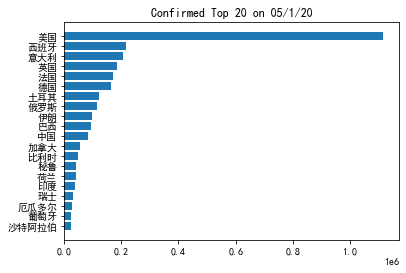

In [96]:
# 全球top 20 
date = 100

date_range = confirmed_data.iloc[:, 4:-1].columns
confirmed_top = confirmed_data.groupby('Country/Region_zn').agg({date_range[date]:'sum'}).sort_values(by=date_range[date], ascending=False)[:20].to_dict()[date_range[date]]

x = list(confirmed_top.keys())[-1::-1]
y = list(confirmed_top.values())[-1::-1]
plt.barh(x, y)
plt.title('Confirmed Top 20 on %s'%(date_range[date],))
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10600\2439120128.py:16: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


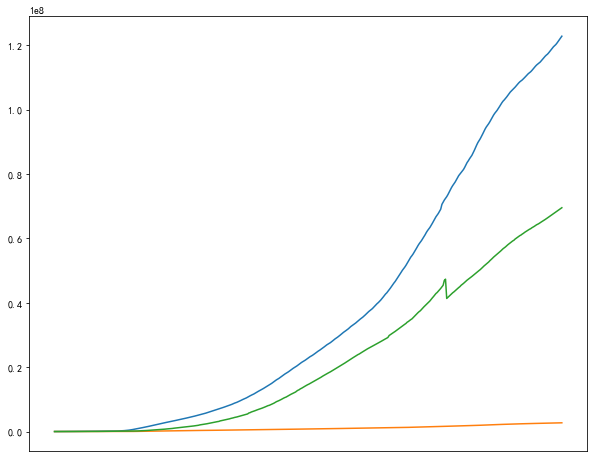

In [115]:
# 全球疫情变化趋势

confirmed_sum = confirmed_data.iloc[:, 4:-1].sum()
death_sum = death_data.iloc[:, 4:-1].sum()
recovered_sum = recovered_data.iloc[:, 4:-1].sum()


x = list(confirmed_sum.to_dict().keys())
y1 = list(confirmed_sum.to_dict().values())
y2 = list(death_sum.to_dict().values())
y3 = list(recovered_sum.to_dict().values())
fig = plt.figure(figsize=(10, 8))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.xticks([])
plt.show()